# Applying SNR to Displacement TS

@author: Max Felius

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re, datetime
import os, sys, time

# personal package for sinkhole comparison
sys.path.extend(os.path.join(os.getcwd(),'package'))
import package.geometric_models as gmodel
import package.physical_models as pmodel
# from package.inverse_kinematic_model import inverse_kinematic_model
from package.sinkhole_data_loader import sinkhole_data_loader

#stochastic scripts
from package.stochastic_center_determination import center_determination as stochastic_center_determination
from package.stochastic_inverse_lsq import inverse_kinematic_model as stochastic_inverse_kinematic_model

#Beyer scripts
from package.beyer_center_determination import center_determination as beyer_center_determination
from package.beyer_inverse_lsq import inverse_kinematic_model as beyer_inverse_kinematic_model

#sanns scripts
from package.sanns_center_determination import center_determination as sanns_center_determination
from package.sanns_inverse_lsq import inverse_kinematic_model as sanns_inverse_kinematic_model

#geometric models
from package.geometric_models import gaussian
from package.geometric_models import beyer
from package.geometric_models import sann

#physical model
from package.physical_models import mogi
from package.physical_models import least_squares_mogi

#bals' geometric model
from package.balls_lsq import inverse_kinematic_model
from package.balls_lsq import zg as bals_zg
from package.balls_lsq import center_determination

data_folder = 'Wink2016'

start_date = '20150421'
start_date_datetime = datetime.datetime.strptime(start_date,'%Y%m%d')
date_list = []
delta_days = []
data_list = []

for date in sorted(os.listdir(data_folder)):
    if date.endswith('.csv'):
        #get the date from the title
        m = re.search(r'\d{8}',date)
        date_conv = datetime.datetime.strptime(m.group(0),'%Y%m%d')
        date_list.append(date_conv)

        #Determine the number of days since the start date
        delta_days.append((date_conv-start_date_datetime).days)

        #Read the data from the files
        data_list.append(pd.read_csv(os.path.join(data_folder,date),header=None))

#extract and combine x and z coordinates and define t
x = np.array([])
y = np.array([])
t = np.array([])
nitems = 0
for idx,item in enumerate(data_list):
    nitems += 1
    n = len(item)
    t = np.concatenate((t,[delta_days[idx]]*n))
    x = np.concatenate((x,item[0].values))
    y = np.concatenate((y,item[1].values))

#from cm to meter
y = y/100

In [2]:
# Global variables
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],100)
v_in = 1000
R_in = 470

# Determine stochastic function center
#center determination based on the RMSE
stochastic_center = stochastic_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
stochastic_x0 = x0_array[np.where(min(stochastic_center)==stochastic_center)[0]]
stochastic_r = np.sqrt((x-stochastic_x0)**2)

#estimate v and R
stochastic_gv, stochastic_gR = stochastic_inverse_kinematic_model(v_in,t,R_in,stochastic_r,y)

# Determine Beyer function center
#center determination based on the RMSE
beyer_center = beyer_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
beyer_x0 = x0_array[np.where(min(beyer_center)==beyer_center)[0]]
beyer_r = np.sqrt((x-beyer_x0)**2)

#estimate v and R
beyer_gv, beyer_gR = beyer_inverse_kinematic_model(v_in,t,R_in,beyer_r,y)

# Determine sanns function center
#center determination based on the RMSE
sanns_center = sanns_center_determination(t,x,y,x0_array,data_list,delta_days,nitems,1000,470)
    
#define r
sanns_x0 = x0_array[np.where(np.nanmin(sanns_center)==sanns_center)[0]]
sanns_r = np.sqrt((x-sanns_x0)**2)

#estimate v and R
sanns_gv, sanns_gR = sanns_inverse_kinematic_model(v_in,t,R_in,sanns_r,y)

Determining Center Position:  67%|██████▋   | 67/100 [00:07<00:09,  3.45it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017354487840409635 and R=2175.6848396892638.


Determining Center Position:  69%|██████▉   | 69/100 [00:08<00:09,  3.37it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00017063575799162317 and R=2607.1739492309034.
Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001693995576090727 and R=2878.773546782562.


Determining Center Position:  72%|███████▏  | 72/100 [00:08<00:06,  4.15it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001682820140064263 and R=3206.095684126621.


Determining Center Position:  74%|███████▍  | 74/100 [00:09<00:06,  3.82it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016548974302476438 and R=-4894.100140909824.


Determining Center Position:  75%|███████▌  | 75/100 [00:11<00:20,  1.19it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/stochastic_inverse_lsq.py:63: RuntimeWarning: overflow encountered in matmul
  if dx_hat.T @ Qxhat @ dx_hat < sys.float_info.epsilon:
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:23: RuntimeWarning: overflow encountered in double_scalars
  return ((2*np.pi*r**2)/(R**3))*np.exp(-np.pi * (r**2/R**2))
Determining Center Position:  76%|███████▌  | 76/100 [00:11<00:15,  1.56it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.00016470615126157123 and R=-6073.325279631064.


Determining Center Position:  79%|███████▉  | 79/100 [00:12<00:08,  2.37it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-0.0001633057394702603 and R=20924.05420929238.


Determining Center Position:  94%|█████████▍| 94/100 [00:13<00:00, 10.83it/s]/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/stochastic_inverse_lsq.py:54: RuntimeWarning: invalid value encountered in matmul
  dx = Qxhat @ J.T @ invQyy @ dy
Determining Center Position:  98%|█████████▊| 98/100 [00:13<00:00, 10.39it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Stopped at iteration 21.
The computed values are v=-0.00031597073004308967 and R=557.5030883088658.
The total runtime was: 0.03448796272277832 seconds.


Determining Center Position:  19%|█▉        | 19/100 [00:03<00:33,  2.41it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-107.68411715635675 and R=598.4327827888039.


Determining Center Position:  20%|██        | 20/100 [00:03<00:28,  2.82it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-96.78990487057501 and R=559.3958985422846.


Determining Center Position:  21%|██        | 21/100 [00:04<00:24,  3.19it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-92.23725719380971 and R=542.5997344119988.


Determining Center Position:  22%|██▏       | 22/100 [00:04<00:22,  3.46it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-89.78172595737999 and R=533.4000819182605.


Determining Center Position:  27%|██▋       | 27/100 [00:05<00:16,  4.41it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-84.98510260479814 and R=515.7821723616534.


Determining Center Position:  28%|██▊       | 28/100 [00:05<00:16,  4.28it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-85.4307304009745 and R=517.9445215066975.


Determining Center Position:  67%|██████▋   | 67/100 [00:09<00:03,  9.20it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-446.9390180919547 and R=1555.4739021026478.


Determining Center Position:  71%|███████   | 71/100 [00:10<00:04,  6.85it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-1026.2277656342585 and R=2407.7500184532773.


Determining Center Position:  73%|███████▎  | 73/100 [00:10<00:04,  5.46it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-1660.539945560889 and R=3082.70553655877.


Determining Center Position:  74%|███████▍  | 74/100 [00:10<00:05,  5.10it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-2278.864711612412 and R=3621.9096135007794.


Determining Center Position:  75%|███████▌  | 75/100 [00:11<00:05,  4.88it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-3461.6055476366782 and R=4476.197237347852.


Determining Center Position:  76%|███████▌  | 76/100 [00:11<00:05,  4.63it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-6610.406019696529 and R=6201.635087792969.


Determining Center Position:  79%|███████▉  | 79/100 [00:11<00:03,  5.49it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-40091.152111046526 and R=15310.003994912257.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:35: RuntimeWarning: overflow encountered in double_scalars
  return (-6*(R**2 -3*r**2)*(R**2 - r**2))/(np.pi*R**7)
Determining Center Position:   0%|          | 0/100 [00:00<?, ?it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=-85.4307304009745 and R=517.9445215066975.
The total runtime was: 0.1534409523010254 seconds.


/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/geometric_models.py:38: RuntimeWarning: divide by zero encountered in true_divide
  return (2/(np.pi*np.sqrt(np.pi)*R))*(1/r)*np.exp(-4*(r/R)**2)
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/sanns_inverse_lsq.py:41: RuntimeWarning: invalid value encountered in multiply
  yhat = v*t*zg(R,r)
/Users/maxfelius/OneDrive/Study/Geoscience and Remote Sensing Master/year 2/Thesis/Thesis_Final/Chapters/4.Results/Simulated_Deformation_Time_Series_based_on_Kinematic_Model/3.Comparing_the_kinematic_model_to_real_world_cases/Wink_thesis/package/sanns_inverse_ls

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.


Determining Center Position: 100%|██████████| 100/100 [00:07<00:00, 14.25it/s]

Ended using the maximum number of iterations: 100.
The computed values are v=nan and R=nan.
Stopped at iteration 8.
The computed values are v=-3475400619.4813414 and R=61790716931.101364.
The total runtime was: 0.0194549560546875 seconds.


In [3]:
# Global variables
v_in = -0.001
R_in = 440
x_data_list = data_list[0][0].values
x0_array = np.linspace(x_data_list[10],x_data_list[-10],100)
theta = np.deg2rad(35)
center = center_determination(t,x,y,x0_array,data_list,delta_days,nitems,v_in,R_in,theta)


bals_x0 = x0_array[np.where(np.nanmin(center)==center)[0]]
r = np.sqrt((x-bals_x0)**2)

#estimate v and R
bals_gv, bals_gR, bals_gTheta = inverse_kinematic_model(v_in,t,R_in,r,y,theta)
print(f'Theta: {np.rad2deg(bals_gTheta)} degree. H: {abs(bals_gR)/np.tan(bals_gTheta)} m. x0: {bals_x0[0]}')

Determining Center Position: 100%|██████████| 100/100 [00:04<00:00, 20.18it/s]


Stopped at iteration 3.
The computed values are v=-0.00031520402803771627 and R=-370.2659786143914.
The total runtime was: 0.0081939697265625 seconds.
Theta: 57.67904662807718 degree. H: 234.2620021886779 m. x0: 458.24852092913284


In [4]:
#Define parameters for the mogi model
poisson = 0.3

x = x #already defined
z = np.zeros((len(x))) 

x0 = stochastic_x0
z0 = -500 #[m], from literature

mogi_xhat = least_squares_mogi(t,poisson,x,z,x0,z0,y)

print('Delta V is {:.2f} m3/day'.format(-mogi_xhat[0]))

Delta V is 293.49 m3/day


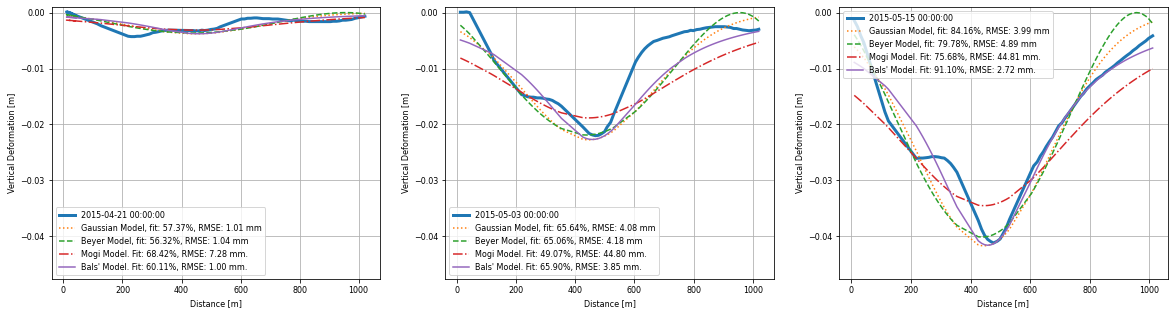

In [5]:
#figure that only plots 3 figure in one single row
nitems_list = [1,6,10]
nitems = len(nitems_list)

plt.rcParams.update({'font.size': 8})
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
#     i = nitems_list[i]
    #compute some parameters
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
    
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
    #computing the bals model and fit
    sanns_r1 = np.sqrt((x1-sanns_x0)**2)
    y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
    ehat = y_data - y3
    bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[2,i] = bals_fit
    bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[2,i] = bals_RMSE
    
#     mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE

    #plotting the data
    ax[i].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
    #plotting the gaussian model
    ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
    #plotting the beyer model
    ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
    #plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
    #plot mogi model
    ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
    #bals function
    ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    

    
    #Notations
    ax[i].grid(True)
    ax[i].set_xlabel('Distance [m]')
    ax[i].set_ylabel('Vertical Deformation [m]')
    ax[i].set_ylim(zmin*1.1,0.001)
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
    ax[i].legend()

#skip the first fit percentage
avg_gfit = np.sum(fit_list[0,1:])/(nitems-1)
avg_befit = np.sum(fit_list[1,1:])/(nitems-1)
avg_bafit = np.sum(fit_list[2,1:])/(nitems-1)
avg_mofit = np.sum(fit_list[3,1:])/(nitems-1)
avg_balsfit = np.sum(fit_list[4,1:])/(nitems-1)

avg_gRMSE = np.sum(RMSE_list[0,:])/(nitems)
avg_beRMSE = np.sum(RMSE_list[1,:])/(nitems)
avg_baRMSE = np.sum(RMSE_list[2,:])/(nitems)
avg_moRMSE = np.sum(RMSE_list[3,:])/(nitems)
avg_balsRMSE = np.sum(RMSE_list[4,:])/(nitems)

Text(0, 0.5, 'Signal Strength [dB]')

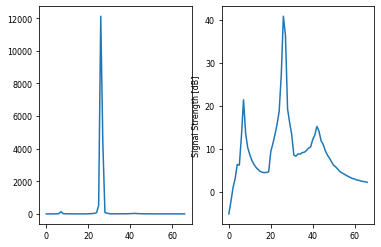

In [6]:
#determine the SNR of the signals

#using gaussian
#compute some parameters
y_data = data_list[nitems_list[-1]][1].values/100 #from cm to meter
x1 = data_list[nitems_list[-1]][0].values
r1 = np.sqrt((x1-x0)**2)
z1 = np.zeros((len(x1)))

#computing the gaussian model and fit
stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
y1 = stochastic_gv*delta_days[nitems_list[-1]]*gaussian(stochastic_gR,stochastic_r1)

#implement snr
ehat = np.abs(y_data - y1)

SNR = np.abs(y_data)/ehat

fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].plot(range(len(ehat)),SNR)

SNR_dB = 10*np.log10(SNR)
ax[1].plot(range(len(ehat)),SNR_dB)
ax[1].set_ylabel('Signal Strength [dB]')

In [16]:
mogi_y.T[0]

array([-0.01480034, -0.0152918 , -0.0157604 , -0.01627892, -0.01992648,
       -0.02058263, -0.02605442, -0.02660934, -0.02729587, -0.02792704,
       -0.02845855, -0.02902236, -0.02961284, -0.03018321, -0.03069223,
       -0.03114247, -0.031641  , -0.03207597, -0.0324515 , -0.0328833 ,
       -0.03445025, -0.03451332, -0.03452707, -0.03449749, -0.0344247 ,
       -0.03431952, -0.03412336, -0.03393533, -0.03371311, -0.03341234,
       -0.03306865, -0.02988832, -0.02947431, -0.02883567, -0.02826655,
       -0.02768593, -0.02714129, -0.02649799, -0.02589508, -0.02468025,
       -0.02402587, -0.02337317, -0.02286306, -0.0203734 , -0.01984877,
       -0.01928928, -0.01869823, -0.01816044, -0.01763366, -0.01711849,
       -0.01657685, -0.01612347, -0.01564411, -0.01510618, -0.01468759,
       -0.0142794 , -0.01381642, -0.01339911, -0.01296319, -0.01257078,
       -0.01221891, -0.01179296, -0.01146301, -0.0111163 , -0.01072974,
       -0.01043061, -0.010022  ])

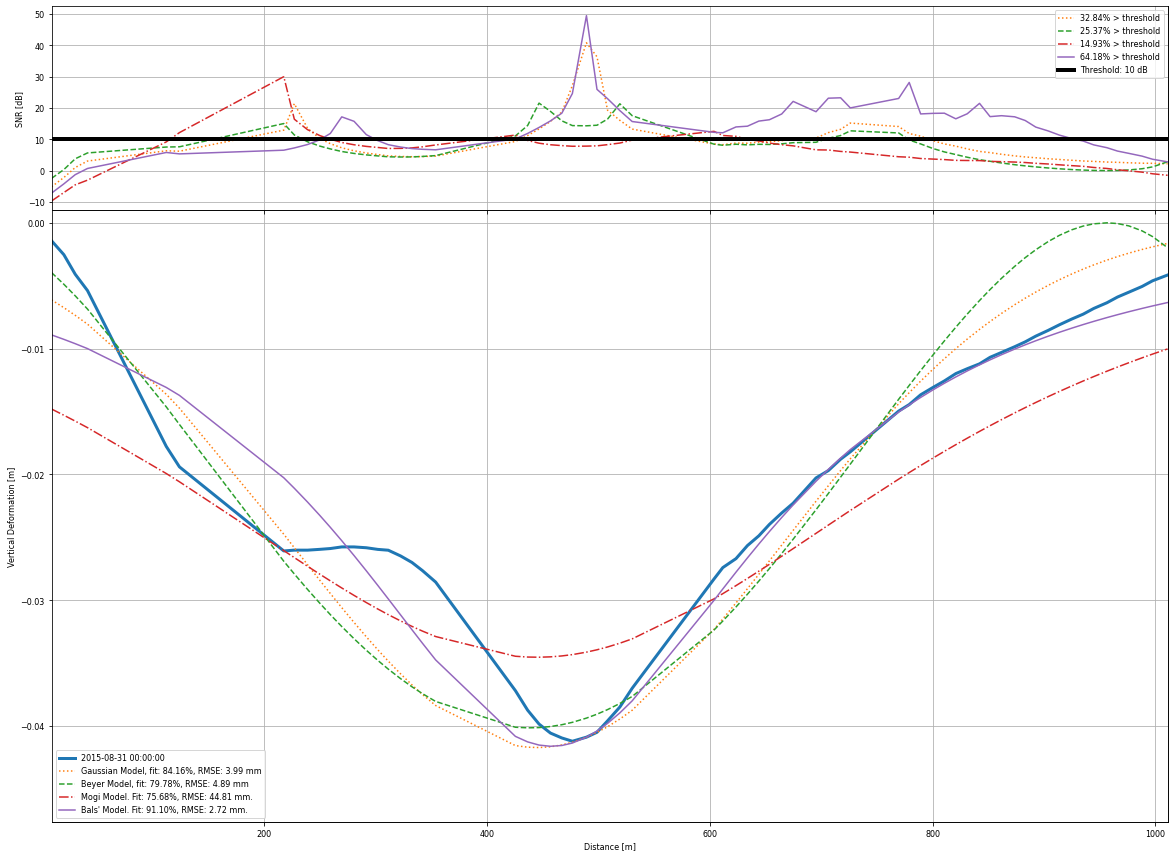

In [27]:
fig, main_ax = plt.subplots(nrows=1,ncols=1, figsize = (20,15))

#get extra top figure
grid = plt.GridSpec(4, 4, hspace=0, wspace=0)
ax_test = fig.get_axes()[0]
ax_test.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
ax = fig.add_subplot(grid[1:,:])
y_snr = fig.add_subplot(grid[0:1,:],xticklabels=[])

zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

#     i = nitems_list[i]
#compute some parameters
y_data = data_list[-1][1].values/100 #from cm to meter
x1 = data_list[-1][0].values
r1 = np.sqrt((x1-x0)**2)
z1 = np.zeros((len(x1)))

#computing the gaussian model and fit
stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
y1 = stochastic_gv*delta_days[-1]*gaussian(stochastic_gR,stochastic_r1)
ehat = y_data - y1
gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
# fit_list[0,i] = gfit
gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
# RMSE_list[0,i] = gaus_RMSE

#computing the beyer model and fit
beyer_r1 = np.sqrt((x1-beyer_x0)**2)
y2 = beyer_gv*delta_days[-1]*beyer(beyer_gR,beyer_r1)
ehat = y_data - y2
beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
# fit_list[1,i] = beyer_fit
beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
# RMSE_list[1,i] = beyer_RMSE

#computing the bals model and fit
sanns_r1 = np.sqrt((x1-sanns_x0)**2)
y3 = sanns_gv*delta_days[-1]*sann(sanns_gR,sanns_r1)
ehat = y_data - y3
bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
# fit_list[2,i] = bals_fit
bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
# RMSE_list[2,i] = bals_RMSE

#     mogi model
mogi_y = mogi_xhat*delta_days[-1]*mogi(poisson,x1,z1,x0,z0).T
ehat = y_data - mogi_y.T
mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
# fit_list[3,i] = mogi_fit
# RMSE_list[3,i] = mogi_RMSE

# bals' model
bals_r1 = np.sqrt((x1-bals_x0)**2)
y4 = bals_gv*delta_days[-1]*bals_zg(bals_gR,bals_r1,bals_gTheta)
ehat = y_data - y4
bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
# fit_list[4,i] = bals1_fit
bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
# RMSE_list[4,i] = bals1_RMSE

#plotting the data
obs_fig = ax.plot(x1,y_data,label=date_list[-1],linewidth=3.0)

#plotting the gaussian model
gauss_fig = ax.plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  

#plotting the beyer model
beyer_fig = ax.plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')

#plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))

#plot mogi model
mogi_fig = ax.plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')

#bals function
bals_fig = ax.plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')

# addding smaller subplots
def get_snr(obs,adj_obs):
    ehat = np.abs(obs - adj_obs)
    SNR = np.abs(obs)/ehat
    return 10*np.log10(SNR)

snr_gauss = get_snr(y_data,y1)
snr_beyer = get_snr(y_data,y2)
snr_mogi = get_snr(y_data,mogi_y.T[0])
snr_bals = get_snr(y_data,y4)

threshold = 10

#check percentage above the threshold
above_threshold_gauss = snr_gauss>threshold
above_threshold_beyer = snr_beyer>threshold
above_threshold_mogi = snr_mogi>threshold
above_threshold_bals = snr_bals>threshold

#notations snr figure
gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
bals_perc = np.sum(above_threshold_bals)/len(snr_bals)

y_snr.plot(x1,snr_gauss,c=gauss_fig[0].get_color(),linestyle='dotted',label='{:.02f}% > threshold'.format(gauss_perc*100))
y_snr.plot(x1,snr_beyer,c=beyer_fig[0].get_color(),linestyle='dashed',label='{:.02f}% > threshold'.format(beyer_perc*100))
y_snr.plot(x1,snr_mogi,c=mogi_fig[0].get_color(),linestyle='dashdot',label='{:.02f}% > threshold'.format(mogi_perc*100))
y_snr.plot(x1,snr_bals,c=bals_fig[0].get_color(),label='{:.02f}% > threshold'.format(bals_perc*100))
y_snr.plot(x1,[threshold for _ in range(len(x1))],c='k',linewidth=3,label='Threshold: {:.0f} dB'.format(threshold))

y_snr.legend()
y_snr.grid(True)
y_snr.set_xlim([min(x1),max(x1)])
y_snr.set_ylabel('SNR [dB]')

#Notations
ax.grid(True)
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Vertical Deformation [m]')
ax.set_ylim(zmin*1.1,0.001)
ax.set_xlim([min(x1),max(x1)])
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
ax.legend();

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.4, wspace=0.4)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [ ]:
#figure that only plots 3 figure in one single row
nitems_list = [1,6,10]
nitems = len(nitems_list)

plt.rcParams.update({'font.size': 8})
# plt.figure(figsize=(15,10))
fig, ax = plt.subplots(nrows=1,ncols=3, figsize = (20,5))

zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
#     i = nitems_list[i]
    #compute some parameters
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
    
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
    #computing the bals model and fit
    sanns_r1 = np.sqrt((x1-sanns_x0)**2)
    y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
    ehat = y_data - y3
    bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[2,i] = bals_fit
    bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[2,i] = bals_RMSE
    
#     mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE

    #plotting the data
    ax[i].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
    #plotting the gaussian model
    ax[i].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
    #plotting the beyer model
    ax[i].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
    #plotting the beyer model
#     ax[i].plot(x1,y3,label='Sanns Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(bals_fit,bals_RMSE))
    
    #plot mogi model
    ax[i].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
    #bals function
    ax[i].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    

    
    #Notations
    ax[i].grid(True)
    ax[i].set_xlabel('Distance [m]')
    ax[i].set_ylabel('Vertical Deformation [m]')
    ax[i].set_ylim(zmin*1.1,0.001)
#     ax[i].set_title('Model fit: {:.4f}'.format(fit))
    ax[i].legend()

# Test for top plots on subplots


In [ ]:
# addding smaller subplots
def get_snr(obs,adj_obs):
    ehat = np.abs(obs - adj_obs)
    SNR = np.abs(obs)/ehat
    return 10*np.log10(SNR)

In [ ]:
snr_gauss = get_snr(y_data,y1)
snr_beyer = get_snr(y_data,y2)
snr_mogi = get_snr(y_data,mogi_y.T[0])
snr_bals = get_snr(y_data,y4)

threshold = 10

#check percentage above the threshold
above_threshold_gauss = snr_gauss>threshold
above_threshold_beyer = snr_beyer>threshold
above_threshold_mogi = snr_mogi>threshold
above_threshold_bals = snr_bals>threshold

#notations snr figure
gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
bals_perc = np.sum(above_threshold_bals)/len(snr_bals)

y_snr.plot(x1,snr_gauss,c=gauss_fig[0].get_color(),linestyle='dotted',label='{:.02f}% > threshold'.format(gauss_perc*100))
y_snr.plot(x1,snr_beyer,c=beyer_fig[0].get_color(),linestyle='dashed',label='{:.02f}% > threshold'.format(beyer_perc*100))
y_snr.plot(x1,snr_mogi,c=mogi_fig[0].get_color(),linestyle='dashdot',label='{:.02f}% > threshold'.format(mogi_perc*100))
y_snr.plot(x1,snr_bals,c=bals_fig[0].get_color(),label='{:.02f}% > threshold'.format(bals_perc*100))
y_snr.plot(x1,[threshold for _ in range(len(x1))],c='k',linewidth=3,label='Threshold: {:.0f} dB'.format(threshold))

y_snr.legend()
y_snr.grid(True)
y_snr.set_xlim([min(x1),max(x1)])
y_snr.set_ylabel('SNR [dB]')

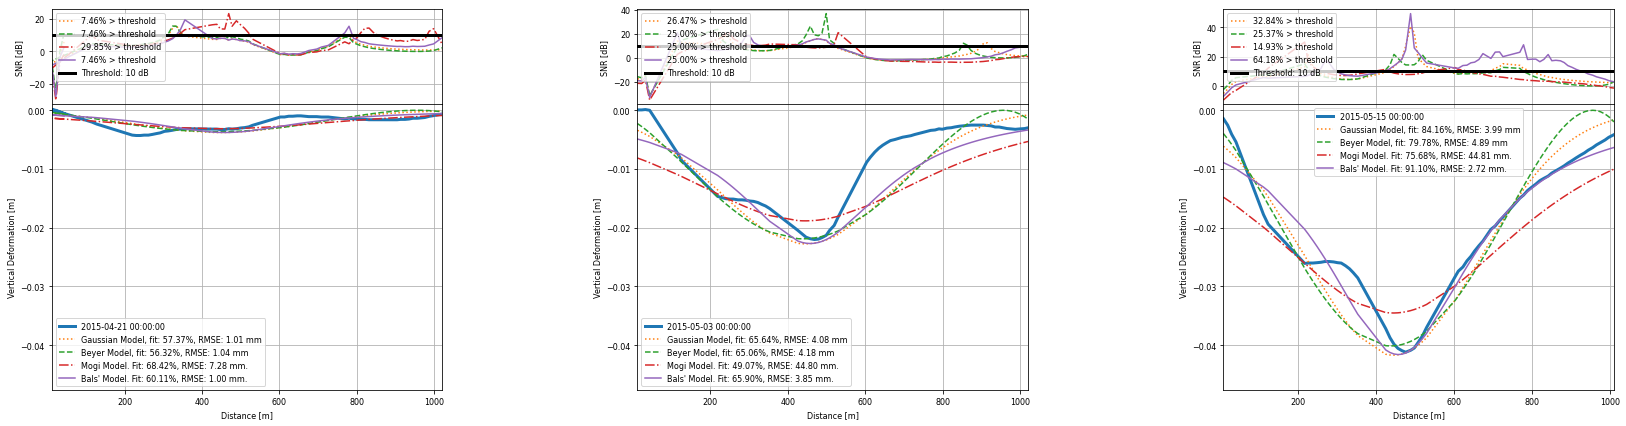

In [48]:
#creating the figure outline
fig = plt.figure(figsize=(28,7))
spec = plt.GridSpec(4,3,hspace=0,wspace=0.5)

ax_tl = fig.add_subplot(spec[0, 0],xticklabels=[])
ax_bl = fig.add_subplot(spec[1:, 0])
ax_tm = fig.add_subplot(spec[0, 1],xticklabels=[])
ax_bm = fig.add_subplot(spec[1:, 1])
ax_tr = fig.add_subplot(spec[0, 2],xticklabels=[])
ax_br = fig.add_subplot(spec[1:, 2])

axes_list = [(ax_tl,ax_bl),(ax_tm,ax_bm),(ax_tr,ax_br)]

#figure standard variables
threshold = 10
nitems_list = [1,6,10]
nitems = len(nitems_list)
# plt.rcParams.update({'font.size': 8})
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))

for i in range(nitems):
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
     
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
    #computing the bals model and fit
    sanns_r1 = np.sqrt((x1-sanns_x0)**2)
    y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
    ehat = y_data - y3
    bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[2,i] = bals_fit
    bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[2,i] = bals_RMSE
    
    #mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #plotting the models in the figures
    #plotting the data
    axes_list[i][1].plot(x1,y_data,label=date_list[i],linewidth=3.0)
    
    #plotting the gaussian model
    gauss_fig = axes_list[i][1].plot(x1,y1,label='Gaussian Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(gfit,gaus_RMSE),linestyle='dotted')  
    
    #plotting the beyer model
    beyer_fig = axes_list[i][1].plot(x1,y2,label='Beyer Model, fit: {:.2f}%, RMSE: {:.2f} mm'.format(beyer_fit,beyer_RMSE),linestyle='dashed')
    
    #plot mogi model
    mogi_fig = axes_list[i][1].plot(x1,mogi_y,label='Mogi Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(mogi_fit,mogi_RMSE),linestyle='dashdot')
    
    #bals function
    bals_fig = axes_list[i][1].plot(x1,y4,label='Bals\' Model. Fit: {:.2f}%, RMSE: {:.2f} mm.'.format(bals1_fit,bals1_RMSE),linestyle='solid')
    
    #Notations
    axes_list[i][1].grid(True)
    axes_list[i][1].set_xlim([min(x1),max(x1)])
    axes_list[i][1].set_xlabel('Distance [m]')
    axes_list[i][1].set_ylabel('Vertical Deformation [m]')
    axes_list[i][1].set_ylim(zmin*1.1,0.001)
    axes_list[i][1].legend()
    
    #add SNR figure
    snr_gauss = get_snr(y_data,y1)
    snr_beyer = get_snr(y_data,y2)
    snr_mogi = get_snr(y_data,mogi_y.T[0])
    snr_bals = get_snr(y_data,y4)

    #check percentage above the threshold
    above_threshold_gauss = snr_gauss>threshold
    above_threshold_beyer = snr_beyer>threshold
    above_threshold_mogi = snr_mogi>threshold
    above_threshold_bals = snr_bals>threshold

    #notations snr figure
    gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
    beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
    mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
    bals_perc = np.sum(above_threshold_bals)/len(snr_bals)
    
    axes_list[i][0].plot(x1,snr_gauss,c=gauss_fig[0].get_color(),linestyle='dotted',label='{:.02f}% > threshold'.format(gauss_perc*100))
    axes_list[i][0].plot(x1,snr_beyer,c=beyer_fig[0].get_color(),linestyle='dashed',label='{:.02f}% > threshold'.format(beyer_perc*100))
    axes_list[i][0].plot(x1,snr_mogi,c=mogi_fig[0].get_color(),linestyle='dashdot',label='{:.02f}% > threshold'.format(mogi_perc*100))
    axes_list[i][0].plot(x1,snr_bals,c=bals_fig[0].get_color(),label='{:.02f}% > threshold'.format(bals_perc*100))
    axes_list[i][0].plot(x1,[threshold for _ in range(len(x1))],c='k',linewidth=3,label='Threshold: {:.0f} dB'.format(threshold))

    axes_list[i][0].legend()
    axes_list[i][0].grid(True)
    axes_list[i][0].set_xlim([min(x1),max(x1)])
    axes_list[i][0].set_ylabel('SNR [dB]')

In [60]:
#figure standard variables
threshold = 25
nitems_list = np.arange(11)
nitems = len(nitems_list)
# plt.rcParams.update({'font.size': 8})
zmin = min(data_list[-2][1]/100)
fit_list = np.zeros((5,nitems))
RMSE_list = np.zeros((5,nitems))
snr_list = np.zeros((5,nitems))

for i in range(nitems):
    y_data = data_list[nitems_list[i]][1].values/100 #from cm to meter
    x1 = data_list[nitems_list[i]][0].values
    r1 = np.sqrt((x1-x0)**2)
    z1 = np.zeros((len(x1)))
     
    #computing the gaussian model and fit
    stochastic_r1 = np.sqrt((x1-stochastic_x0)**2)
    y1 = stochastic_gv*delta_days[nitems_list[i]]*gaussian(stochastic_gR,stochastic_r1)
    ehat = y_data - y1
    gfit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[0,i] = gfit
    gaus_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[0,i] = gaus_RMSE
    
    #computing the beyer model and fit
    beyer_r1 = np.sqrt((x1-beyer_x0)**2)
    y2 = beyer_gv*delta_days[nitems_list[i]]*beyer(beyer_gR,beyer_r1)
    ehat = y_data - y2
    beyer_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[1,i] = beyer_fit
    beyer_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[1,i] = beyer_RMSE
    
    #computing the bals model and fit
    sanns_r1 = np.sqrt((x1-sanns_x0)**2)
    y3 = sanns_gv*delta_days[nitems_list[i]]*sann(sanns_gR,sanns_r1)
    ehat = y_data - y3
    bals_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[2,i] = bals_fit
    bals_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[2,i] = bals_RMSE
    
    #mogi model
    mogi_y = mogi_xhat*delta_days[nitems_list[i]]*mogi(poisson,x1,z1,x0,z0).T
    ehat = y_data - mogi_y.T
    mogi_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    mogi_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))[0][0]*1000
    fit_list[3,i] = mogi_fit
    RMSE_list[3,i] = mogi_RMSE
    
    # bals' model
    bals_r1 = np.sqrt((x1-bals_x0)**2)
    y4 = bals_gv*delta_days[nitems_list[i]]*bals_zg(bals_gR,bals_r1,bals_gTheta)
    ehat = y_data - y4
    bals1_fit = 100*(1-(np.sum(abs(ehat))/np.sum(abs(y_data))))
    fit_list[4,i] = bals1_fit
    bals1_RMSE = np.sqrt((ehat @ ehat.T)/len(ehat))*1000
    RMSE_list[4,i] = bals1_RMSE
    
    #add SNR figure
    snr_gauss = get_snr(y_data,y1)
    snr_beyer = get_snr(y_data,y2)
    snr_mogi = get_snr(y_data,mogi_y.T[0])
    snr_bals = get_snr(y_data,y4)

    #check percentage above the threshold
    above_threshold_gauss = snr_gauss>threshold
    above_threshold_beyer = snr_beyer>threshold
    above_threshold_mogi = snr_mogi>threshold
    above_threshold_bals = snr_bals>threshold

    #notations snr figure
    gauss_perc = np.sum(above_threshold_gauss)/len(snr_gauss)
    beyer_perc = np.sum(above_threshold_beyer)/len(snr_beyer)
    mogi_perc = np.sum(above_threshold_mogi)/len(snr_mogi)
    bals_perc = np.sum(above_threshold_bals)/len(snr_bals)
    
    snr_list[0,i] = gauss_perc
    snr_list[1,i] = beyer_perc
    snr_list[2,i] = mogi_perc
    snr_list[3,i] = bals_perc
    snr_list[4,i] = 0
print('done')

done


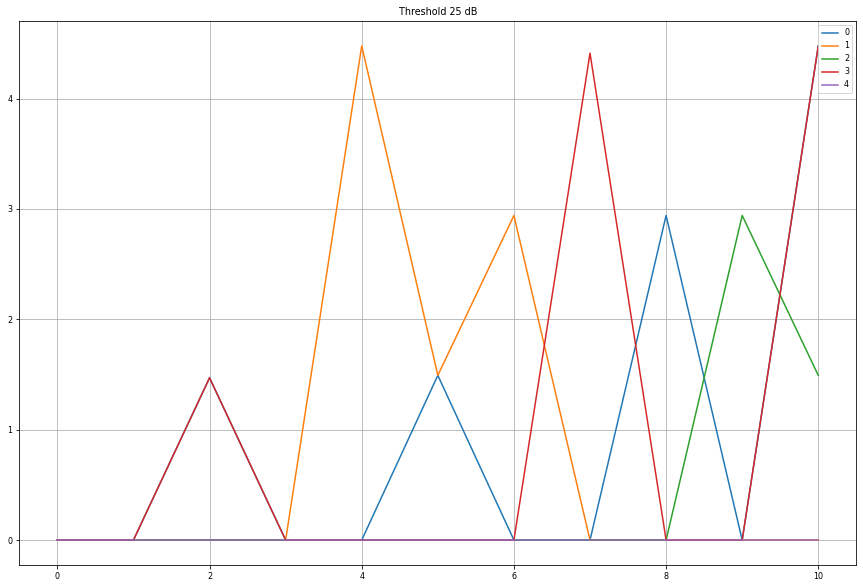

In [61]:
plt.figure(figsize=(15,10))

for i in range(5):
    plt.plot(range(nitems),snr_list[i,:]*100,label=f'{i}')
plt.title(f'Threshold {threshold} dB')
plt.grid(True)
plt.legend();